In [7]:
# DATA LINKS

henry_word2vec_custom_debiased = '/content/drive/MyDrive/Courses/Sophomore Spring Courses/CS226R/Debiasing Algorithm Data/word2vec_custom_debiased_slimmed.bin.gz'
henry_word2vec_debiased_custom_1 = '/content/drive/MyDrive/Courses/Sophomore Spring Courses/CS226R/Debiasing Algorithm Data/word2vec_custom_debiased_slimmed (1).bin.gz'
henry_word2vec_debiased= "/content/drive/MyDrive/Courses/Sophomore Spring Courses/CS226R/GoogleNews-vectors-negative300-hard-debiased.bin.gz"
henry_word2vec = "/content/drive/MyDrive/Courses/Sophomore Spring Courses/CS226R/GoogleNews-vectors-negative300.bin.gz"
henry_imdb = "/content/drive/MyDrive/Courses/Sophomore Spring Courses/CS226R/IMDB Dataset.csv"
joseph_imdb = "/content/drive/MyDrive/CS226R Final Project/IMDB Dataset Processed (1000).csv"
joseph_imdb_debiased = "/content/drive/MyDrive/CS226R Final Project/IMDB Dataset Processed (Debiased) (1000).csv"
joseph_word2vec_debiased_custom = "/content/drive/MyDrive/CS226R Final Project/word2vec_custom_debiased_slimmed.bin.gz"


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

Mounted at /content/drive


In [ ]:
# Load datasets

# imdb = pd.read_csv(joseph_imdb)

In [3]:
# Load datasets

imdb = pd.read_csv(henry_imdb)

In [8]:
# Load word embeddings

from gensim.models import KeyedVectors

# Load the debiased Word2Vec embeddings
word2vec_debiased = henry_word2vec_debiased_custom_1
word2vec_debiased = KeyedVectors.load_word2vec_format(word2vec_debiased, binary=True)

In [9]:
# Load the original Word2Vec embeddings
word2vec_model = henry_word2vec
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model, binary=True)

# # Load modified Word2Vec embeddings
# word2vec_debiased = joseph_word2vec_debiased_custom
# word2vec_debiased = KeyedVectors.load_word2vec_format(word2vec_debiased, binary=True)

In [ ]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
# OPTION 1: Simple average

def process_text1(text, word_embeddings):
    words = text.split()
    word_vectors = []
    for word in words:
        if word in word_embeddings:
            word_vectors.append(word_embeddings[word])

    if len(word_vectors) == 0:
        return np.zeros(word_embeddings.vector_size)

    # Compute the average of word vectors
    return np.mean(word_vectors, axis=0)

def process_dataframe(df, text_col, word_embeddings):
    embedding_column_name = 'sentence_embedding'
    df[embedding_column_name] = df[text_col].apply(process_text1, word_embeddings=word_embeddings)
    num_elements = len(df.loc[0, embedding_column_name])

    embedding_columns = [f"{embedding_column_name}_{i+1}" for i in range(num_elements)]
    embedding_df = pd.DataFrame(df[embedding_column_name].tolist(), columns=embedding_columns)
    collapsed_df = pd.concat([df, embedding_df], axis=1)

    return collapsed_df

imdb_debiased = process_dataframe(imdb, 'review', word2vec_debiased)
imdb = process_dataframe(imdb, 'review', word2vec_model)

imdb.head()

,review,sentiment,sentence_embedding,sentence_embedding_1,sentence_embedding_2,sentence_embedding_3,sentence_embedding_4,sentence_embedding_5,sentence_embedding_6,sentence_embedding_7,...,sentence_embedding_291,sentence_embedding_292,sentence_embedding_293,sentence_embedding_294,sentence_embedding_295,sentence_embedding_296,sentence_embedding_297,sentence_embedding_298,sentence_embedding_299,sentence_embedding_300
0,One of the other reviewers has mentioned that ...,positive,"[0.036482662, 0.036577154, 0.050143886, 0.0777...",0.036483,0.036577,0.050144,0.077718,-0.057214,0.003426,0.040952,...,-0.076731,0.005877,-0.103129,0.019288,-0.030964,-0.011406,0.004300,-0.051275,0.039047,-0.022117
1,A wonderful little production. <br /><br />The...,positive,"[0.061530728, 0.041923016, 0.012232147, 0.0833...",0.061531,0.041923,0.012232,0.083340,-0.057085,0.010716,0.027959,...,-0.110544,0.017014,-0.067316,0.023973,-0.056321,-0.000734,0.049405,-0.036937,0.054146,-0.015095
2,I thought this was a wonderful way to spend ti...,positive,"[0.037757937, 0.040412687, 0.032744925, 0.0893...",0.037758,0.040413,0.032745,0.089311,-0.033327,-0.014206,0.035389,...,-0.088871,0.024897,-0.090965,0.028599,-0.037911,-0.012701,0.023179,-0.043435,0.053076,-0.028869
3,Basically there's a family where a little boy ...,negative,"[0.051116638, 0.026273498, 0.019244231, 0.1071...",0.051117,0.026273,0.019244,0.107193,-0.044001,0.023200,0.027560,...,-0.084502,0.020686,-0.113348,0.023277,-0.026995,-0.036880,0.003985,-0.028562,0.027841,0.020671
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[0.047774006, 0.024292443, 0.03455285, 0.07281...",0.047774,0.024292,0.034553,0.072816,-0.037066,-0.010795,0.042198,...,-0.099677,0.018102,-0.089280,0.015064,-0.043961,0.009620,0.014134,-0.019396,0.053251,-0.030536


In [ ]:
# Classify whether text is more 'male' or 'female', to ascertain gender bias

import gensim.downloader as api
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Define embeddings for "male" and "female" concepts
male_embedding = word2vec_model["male"]
female_embedding = word2vec_model["female"]

# Function to calculate sentence embedding
def calculate_sentence_embedding(sentence):
    words = sentence.lower().split()
    word_embeddings = [word2vec_model[word] for word in words if word in word2vec_model]
    if not word_embeddings:
        # No valid word embeddings found
        return None
    sentence_embedding = np.mean(word_embeddings, axis=0)
    return sentence_embedding

# Function to classify sentence as closer to "male" or "female"
def classify_sentence(sentence):
    sentence_embedding = calculate_sentence_embedding(sentence)
    if sentence_embedding is None:
        return None, None  # Cannot classify if no valid word embeddings found
    similarity_to_male = cosine_similarity([sentence_embedding], [male_embedding])[0][0]
    similarity_to_female = cosine_similarity([sentence_embedding], [female_embedding])[0][0]
    if similarity_to_male > similarity_to_female:
        return "male", similarity_to_male
    else:
        return "female", similarity_to_female

# Function to create new columns indicating gender and cosine similarity score
def create_gender_column(df, text_column_name):
    gender_column, similarity_column = zip(*df[text_column_name].apply(classify_sentence))
    df['gender'] = gender_column
    df['cosine_similarity'] = similarity_column

create_gender_column(imdb, 'review')

In [ ]:
imdb.head()

,review,sentiment,sentence_embedding,sentence_embedding_1,sentence_embedding_2,sentence_embedding_3,sentence_embedding_4,sentence_embedding_5,sentence_embedding_6,sentence_embedding_7,...,sentence_embedding_293,sentence_embedding_294,sentence_embedding_295,sentence_embedding_296,sentence_embedding_297,sentence_embedding_298,sentence_embedding_299,sentence_embedding_300,gender,cosine_similarity
0,One of the other reviewers has mentioned that ...,positive,"[0.036482662, 0.036577154, 0.050143886, 0.0777...",0.036483,0.036577,0.050144,0.077718,-0.057214,0.003426,0.040952,...,-0.103129,0.019288,-0.030964,-0.011406,0.004300,-0.051275,0.039047,-0.022117,male,0.243412
1,A wonderful little production. <br /><br />The...,positive,"[0.061530728, 0.041923016, 0.012232147, 0.0833...",0.061531,0.041923,0.012232,0.083340,-0.057085,0.010716,0.027959,...,-0.067316,0.023973,-0.056321,-0.000734,0.049405,-0.036937,0.054146,-0.015095,male,0.189026
2,I thought this was a wonderful way to spend ti...,positive,"[0.037757937, 0.040412687, 0.032744925, 0.0893...",0.037758,0.040413,0.032745,0.089311,-0.033327,-0.014206,0.035389,...,-0.090965,0.028599,-0.037911,-0.012701,0.023179,-0.043435,0.053076,-0.028869,female,0.253582
3,Basically there's a family where a little boy ...,negative,"[0.051116638, 0.026273498, 0.019244231, 0.1071...",0.051117,0.026273,0.019244,0.107193,-0.044001,0.023200,0.027560,...,-0.113348,0.023277,-0.026995,-0.036880,0.003985,-0.028562,0.027841,0.020671,male,0.242748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[0.047774006, 0.024292443, 0.03455285, 0.07281...",0.047774,0.024292,0.034553,0.072816,-0.037066,-0.010795,0.042198,...,-0.089280,0.015064,-0.043961,0.009620,0.014134,-0.019396,0.053251,-0.030536,female,0.242141


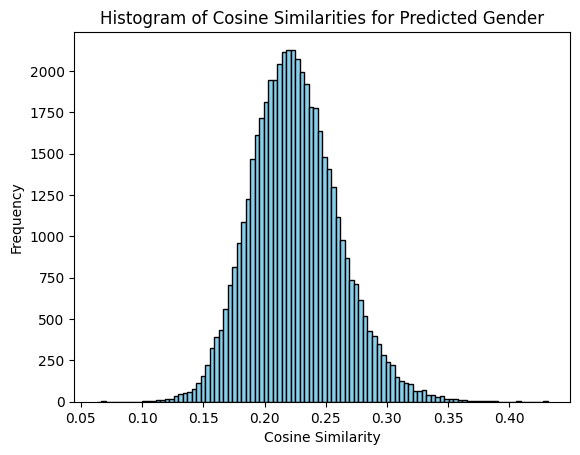

In [ ]:
# Visualize the cosine similarities

import matplotlib.pyplot as plt

# Plot histogram
plt.hist(imdb['cosine_similarity'], bins=100, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarities for Predicted Gender')

# Show plot
plt.show()


In [ ]:
imdb.shape

(50000, 305)

In [ ]:
# Potentially select only the most highly cosine similar data points

N = 1000
sorted_imdb = imdb.sort_values(by='cosine_similarity', ascending=False)
imdb = sorted_imdb.head(N)
selected_indices = imdb.index

In [ ]:
# # Print a few gender classifications of movie reviews as examples

# import pandas as pd

# cosine_similarity_ranges = [(0.1, 0.3), (0.5, 0.6), (0.8, 0.9)]
# results = pd.DataFrame()

# for r in cosine_similarity_ranges:
#     print("Range:", r)

#     filtered_rows = imdb[(imdb['cosine_similarity'] >= r[0]) & (imdb['cosine_similarity'] <= r[1])]
#     top_three_rows = filtered_rows.head(3)

#     results = pd.concat([results, top_three_rows])

#     print(top_three_rows['review'])

In [ ]:
imdb_debiased['gender'] = imdb['gender']
imdb_debiased = imdb_debiased.iloc[selected_indices]
imdb_debiased.head()

,review,sentiment,sentence_embedding,sentence_embedding_1,sentence_embedding_2,sentence_embedding_3,sentence_embedding_4,sentence_embedding_5,sentence_embedding_6,sentence_embedding_7,...,sentence_embedding_292,sentence_embedding_293,sentence_embedding_294,sentence_embedding_295,sentence_embedding_296,sentence_embedding_297,sentence_embedding_298,sentence_embedding_299,sentence_embedding_300,gender
44472,I'm doing a thesis on blurring the boundaries:...,positive,"[0.010630805, 0.0098118, 0.007867424, 0.045636...",0.010631,0.009812,0.007867,0.045637,-0.039473,-0.006465,0.020348,...,0.016809,-0.042840,0.012652,-0.023970,0.000547,0.031450,-0.007298,0.013069,-0.011220,female
4352,Lizzie Borden's Love Crimes is an important fi...,positive,"[0.021680333, 0.021724747, 0.0044313213, 0.023...",0.021680,0.021725,0.004431,0.023377,-0.018311,-0.010647,0.010173,...,-0.000366,-0.038518,-0.000477,-0.033432,0.000167,0.022401,-0.006441,0.022067,0.003202,female
43343,Harem Suare is the best film I saw in the year...,positive,"[0.008508407, 0.015177257, 0.025832413, 0.0315...",0.008508,0.015177,0.025832,0.031588,-0.009949,-0.016894,0.005730,...,-0.004115,-0.047710,0.002895,-0.024506,0.012893,0.008760,-0.014886,0.017910,0.001382,female
49441,"""A young woman suffers from the delusion that ...",negative,"[0.019398667, 0.013674223, 0.013297587, 0.0201...",0.019399,0.013674,0.013298,0.020154,-0.015973,-0.002336,0.007968,...,-0.000399,-0.045838,0.005592,-0.020450,0.007907,0.014341,-0.005029,0.029465,-0.002510,female
22222,'Gross Misconduct' was one of a series of text...,negative,"[0.019786432, 0.015979717, 0.017639246, 0.0403...",0.019786,0.015980,0.017639,0.040306,-0.027410,-0.009575,0.018418,...,0.006134,-0.042880,0.004626,-0.020614,0.005054,0.005512,-0.009254,0.019310,-0.011216,male


In [ ]:
# Save pre-processed datasets


imdb_debiased_path = '/content/drive/MyDrive/Courses/Sophomore Spring Courses/CS226R/IMDB Dataset Processed (Debiased, Custom, 1000, New).csv'
# imdb.to_csv('/content/drive/MyDrive/Courses/Sophomore Spring Courses/CS226R/IMDB Dataset Processed.csv', index=False)
imdb_debiased.to_csv(imdb_debiased_path, index=False)



# Tests for Word Embeddings Bias